# Math 3080 - Group Project 3
In this project, we are going to do an analysis of stock data. In this project, we will practice the following:
* Loading API data
* Manipulating DataFrames
* Joins
* Datetime objects
* Graphing

We are going to obtain stock data from the Alpha Vantage service API service. Here are a couple of helps:
* [Alpha Vantage FAQs](https://www.alphavantage.co/support/#api-key)
* [Alpha Vantage Documentation](https://www.alphavantage.co/documentation/)
  * We will focus on the __DAILY_ADJUSTED__ dataset. You are welcome to experiment and play with the other datasets.

API keys will be emailed to you before this project begins.

You may also want to look back at the *05 Obtaining Data.ipynb* notes to remind yourself of how APIs work.

-----
For this project, we will work with 5 datasets: 
* Google / Alphabet Inc (GOOGL)
* Tesla (TSLA)
* Amazon (AMZN)
* AT&T (T)
* Ford (F)

1. Load the Google dataset
2. Wrangle the data so that,
    * there are two columns for the date and closing values
    * the dates are in datetime format and closing values are floats (You may need to use a .apply() method to turn values into a float)
3. Load the other 4 datasets the same way
4. Join the 5 DataFrames on the dates
5. Show the final DataFrame

In [107]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime
from datetime import date

Google = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GOOGL&outputsize=full&apikey=ENIPDF3XPHW9IUUE&datatype=csv", delimiter=',')
Tesla = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=TSLA&outputsize=full&apikey=ENIPDF3XPHW9IUUE&datatype=csv", delimiter=',')
Amazon = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey=ENIPDF3XPHW9IUUE&datatype=csv", delimiter=',')
ATnT = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=T&outputsize=full&apikey=ENIPDF3XPHW9IUUE&datatype=csv", delimiter=',')
Ford = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=F&outputsize=full&apikey=ENIPDF3XPHW9IUUE&datatype=csv", delimiter=',')

In [108]:
Google['timestamp'] = Google['timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
Tesla['timestamp'] = Tesla['timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
Amazon['timestamp'] = Amazon['timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
ATnT['timestamp'] = ATnT['timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
Ford['timestamp'] = Ford['timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

In [109]:
Google = Google.filter(['timestamp', 'close'])
Tesla = Tesla.filter(['timestamp', 'close'])
Amazon = Amazon.filter(['timestamp', 'close'])
ATnT = ATnT.filter(['timestamp', 'close'])
Ford = Ford.filter(['timestamp', 'close'])

In [110]:
# Google.set_index('timestamp')
# Tesla.set_index('timestamp')
# Amazon.set_index('timestamp')
# ATnT.set_index('timestamp')
# Ford.set_index('Timestamp')

In [111]:
newDataset = pd.merge(Google, Tesla, how='outer', left_index=True, right_index=True)
newDataset.drop(labels='timestamp_y', axis=1, inplace=True)
newDataset.columns = ['Timestamp', 'Tesla', 'Google']
#newDataset.index.names = ['Timestamp']

newDataset2 = pd.merge(ATnT, Amazon, how='outer', left_index=True, right_index=True)
newDataset2.drop(labels='timestamp_y', axis=1, inplace=True)
newDataset2.columns = ['Timestamp', 'AT&T', 'Amazon']
#newDataset2.index.names = ['Timestamp']

bigDataset = pd.merge(newDataset, newDataset2, how='outer', left_on='Timestamp', right_on='Timestamp')

data = pd.merge(bigDataset, Ford, how='outer', left_on='Timestamp', right_on='timestamp')
data.drop(labels='timestamp', axis=1, inplace=True)
data.columns = ['Timestamp', 'Tesla', 'Google', 'AT&T', 'Amazon', 'Ford']
data.set_index('Timestamp')
data


,Timestamp,Tesla,Google,AT&T,Amazon,Ford
0,2024-02-29,138.46,201.88,16.93,176.76,12.44
1,2024-02-28,136.38,202.04,16.96,173.16,12.30
2,2024-02-27,138.88,199.73,16.83,173.54,12.00
3,2024-02-26,137.57,199.40,16.60,174.73,11.95
4,2024-02-23,143.96,191.97,16.80,174.99,12.14
...,...,...,...,...,...,...
6116,1999-11-05,NaN,NaN,51.25,64.94,53.69
6117,1999-11-04,NaN,NaN,49.81,63.06,53.06
6118,1999-11-03,NaN,NaN,50.56,65.81,53.75
6119,1999-11-02,NaN,NaN,50.75,66.44,54.38


-----
6. Plot the 5 stocks over
    * The past month
    * The past 6 months
    * The past year
    * The past 5 years
    
Make sure that each plot has an appropriate title and x- and y-axis labels.

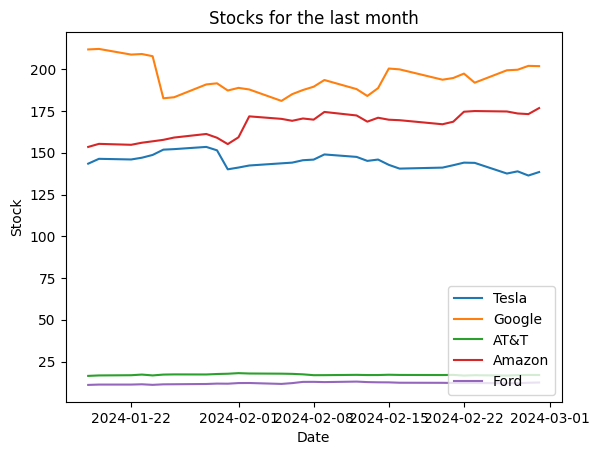

In [112]:
# data[' '].rolling(#).mean() can store that in something
# data[' '].rolliing(#, min_periods=#).mean() makes sure there is enough data in the window to do this
# data[' '].ewm(span=#).mean() exponentially weighted average
# sns.lineplot(data= , x= , y= .pctchange(100))

fig, ax = plt.subplots()

sns.lineplot(data=data, x=data['Timestamp'].head(30), y=data['Tesla'].head(30), label='Tesla')
sns.lineplot(data=data, x=data['Timestamp'].head(30), y=data['Google'].head(30), label='Google')
sns.lineplot(data=data, x=data['Timestamp'].head(30), y=data['AT&T'].head(30), label='AT&T')
sns.lineplot(data=data, x=data['Timestamp'].head(30), y=data['Amazon'].head(30), label='Amazon')
sns.lineplot(data=data, x=data['Timestamp'].head(30), y=data['Ford'].head(30), label='Ford')

ax.set_ylabel('Stock')
ax.set_xlabel('Date')
ax.set_title('Stocks for the last month')
ax.legend(loc='lower right')

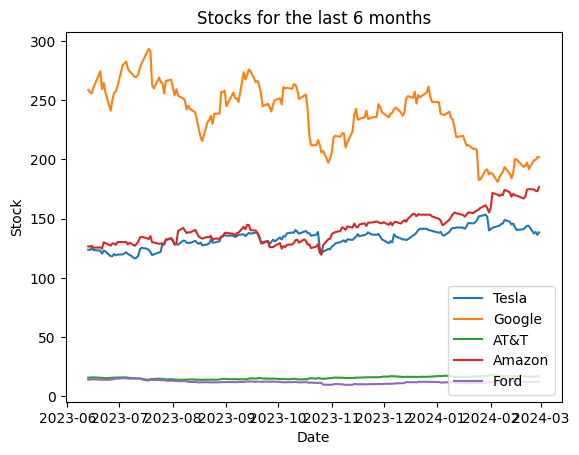

In [113]:
fig, ax = plt.subplots()

sns.lineplot(data=data, x=data['Timestamp'].head(180), y=data['Tesla'].head(180), label='Tesla')
sns.lineplot(data=data, x=data['Timestamp'].head(180), y=data['Google'].head(180), label='Google')
sns.lineplot(data=data, x=data['Timestamp'].head(180), y=data['AT&T'].head(180), label='AT&T')
sns.lineplot(data=data, x=data['Timestamp'].head(180), y=data['Amazon'].head(180), label='Amazon')
sns.lineplot(data=data, x=data['Timestamp'].head(180), y=data['Ford'].head(180), label='Ford')

ax.set_ylabel('Stock')
ax.set_xlabel('Date')
ax.set_title('Stocks for the last 6 months')
ax.legend(loc='lower right')

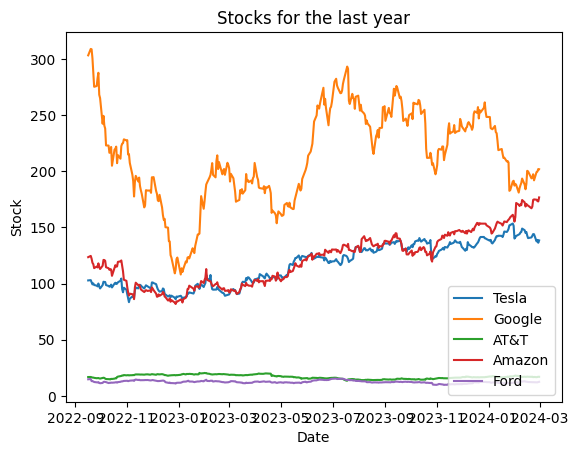

In [114]:
fig, ax = plt.subplots()

sns.lineplot(data=data, x=data['Timestamp'].head(365), y=data['Tesla'].head(365), label='Tesla')
sns.lineplot(data=data, x=data['Timestamp'].head(365), y=data['Google'].head(365), label='Google')
sns.lineplot(data=data, x=data['Timestamp'].head(365), y=data['AT&T'].head(365), label='AT&T')
sns.lineplot(data=data, x=data['Timestamp'].head(365), y=data['Amazon'].head(365), label='Amazon')
sns.lineplot(data=data, x=data['Timestamp'].head(365), y=data['Ford'].head(365), label='Ford')

ax.set_ylabel('Stock')
ax.set_xlabel('Date')
ax.set_title('Stocks for the last year')
ax.legend(loc='lower right')

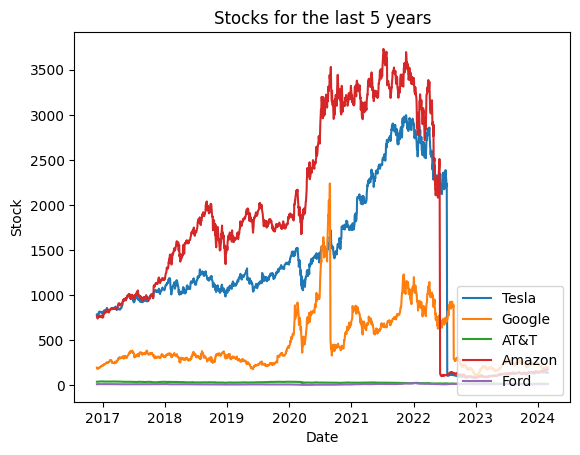

In [115]:
fig, ax = plt.subplots()

sns.lineplot(data=data, x=data['Timestamp'].head(1825), y=data['Tesla'].head(1825), label='Tesla')
sns.lineplot(data=data, x=data['Timestamp'].head(1825), y=data['Google'].head(1825), label='Google')
sns.lineplot(data=data, x=data['Timestamp'].head(1825), y=data['AT&T'].head(1825), label='AT&T')
sns.lineplot(data=data, x=data['Timestamp'].head(1825), y=data['Amazon'].head(1825), label='Amazon')
sns.lineplot(data=data, x=data['Timestamp'].head(1825), y=data['Ford'].head(1825), label='Ford')

ax.set_ylabel('Stock')
ax.set_xlabel('Date')
ax.set_title('Stocks for the last 5 years')
ax.legend(loc='lower right')

You'll notice that there is a sudden drop in the values of Google, Amazon, and Tesla stocks. This happens when the company changes the value of the stocks.
* If you have 10 stocks at \$100 each, then you'll have 20 stocks at \$50 each after the change

-----
7. Compare the Google and Amazon company stocks
    * Plot just the two stocks over the last 6 months and the last year
    * Add the 15-day rolling averages to the graph

In [116]:
def standardize_df(x):
    return (x - x.min()) / (x.max() - x.min())

standard = standardize_df(data)
standard

C:\Users\parke\AppData\Local\Temp\ipykernel_13504\4012232284.py:2: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  return (x - x.min()) / (x.max() - x.min())


,Timestamp,Tesla,Google,AT&T,Amazon,Ford
0,1.0,0.018889,0.083709,0.077248,0.045844,0.200358
1,0.999887,0.018175,0.083781,0.077913,0.044878,0.197849
2,0.999775,0.019033,0.082741,0.075028,0.04498,0.192473
3,0.999662,0.018583,0.082593,0.069922,0.045299,0.191577
4,0.999325,0.020777,0.079251,0.074362,0.045369,0.194982
...,...,...,...,...,...,...
6116,0.00045,NaN,NaN,0.839068,0.015829,0.939606
6117,0.000338,NaN,NaN,0.807103,0.015324,0.928315
6118,0.000225,NaN,NaN,0.823751,0.016063,0.940681
6119,0.000113,NaN,NaN,0.827969,0.016232,0.951971


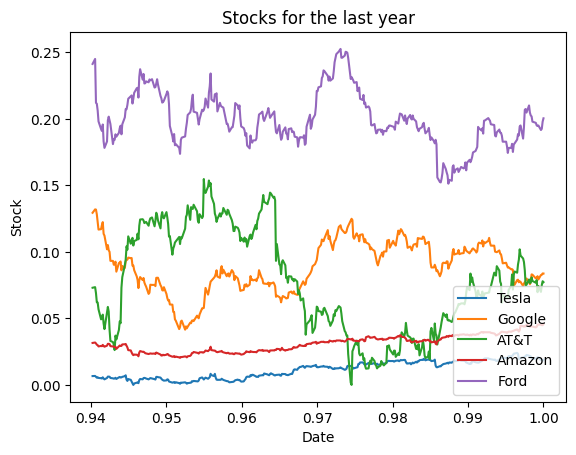

In [120]:
fig, ax = plt.subplots()

sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Tesla'].head(365), label='Tesla')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Google'].head(365), label='Google')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['AT&T'].head(365), label='AT&T')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Amazon'].head(365), label='Amazon')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Ford'].head(365), label='Ford')

ax.set_ylabel('Stock')
ax.set_xlabel('Date')
ax.set_title('Stocks for the last year')
ax.legend(loc='lower right')

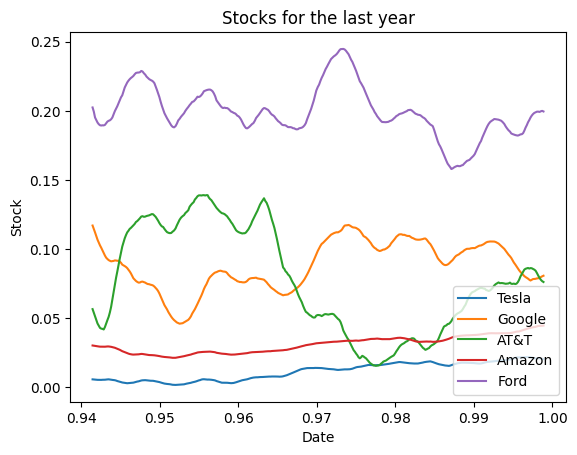

In [123]:
standard = standard.rolling(15).mean()

fig, ax = plt.subplots()

sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Tesla'].head(365), label='Tesla')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Google'].head(365), label='Google')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['AT&T'].head(365), label='AT&T')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Amazon'].head(365), label='Amazon')
sns.lineplot(data=standard, x=standard['Timestamp'].head(365), y=standard['Ford'].head(365), label='Ford')

ax.set_ylabel('Stock')
ax.set_xlabel('Date')
ax.set_title('Stocks for the last year')
ax.legend(loc='lower right')

In [117]:
### What observations can you make from these two graphs?
# don't invest in Amazon and Tesla they don't change much
# 
# 

In [125]:
print(data.corr())

           Timestamp     Tesla    Google      AT&T    Amazon      Ford
Timestamp   1.000000  0.513181  0.613982 -0.298701  0.638479 -0.322720
Tesla       0.513181  1.000000  0.717559  0.132767  0.894652  0.232801
Google      0.613982  0.717559  1.000000 -0.191967  0.783567 -0.089084
AT&T       -0.298701  0.132767 -0.191967  1.000000 -0.029477  0.435340
Amazon      0.638479  0.894652  0.783567 -0.029477  1.000000 -0.116469
Ford       -0.322720  0.232801 -0.089084  0.435340 -0.116469  1.000000


In [131]:
data['Tesla'] = data['Tesla'] / data['Tesla'].sum() * 100
data['Google'] = data['Google'] / data['Google'].sum() * 100
data['AT&T'] = data['AT&T'] / data['AT&T'].sum() * 100
data['Amazon'] = data['Amazon'] / data['Amazon'].sum() * 100
data['Ford'] = data['Ford'] / data['Ford'].sum() * 100
print(data.corr())

           Timestamp     Tesla    Google      AT&T    Amazon      Ford
Timestamp   1.000000  0.513181  0.613982 -0.298701  0.638479 -0.322720
Tesla       0.513181  1.000000  0.717559  0.132767  0.894652  0.232801
Google      0.613982  0.717559  1.000000 -0.191967  0.783567 -0.089084
AT&T       -0.298701  0.132767 -0.191967  1.000000 -0.029477  0.435340
Amazon      0.638479  0.894652  0.783567 -0.029477  1.000000 -0.116469
Ford       -0.322720  0.232801 -0.089084  0.435340 -0.116469  1.000000


# Tesla
- google 0.717 decently correlated
- AT&T 0.132 not correlated much at all
- Amazon 0.8946 very correlated
- Ford 0.232 not correlated much
# Google
- AT&T -0.191 not correlated much negative
- Amazon 0.783 decenlty correlated
- Ford -0.089 almost no correlation negative
# AT&T
- Amazon -0.294 almost no correlation negative
- Ford 0.4353 medium correlation
# Amazon
- Ford -0.116 not correlated much negative